In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# create synthetic datapoints

In [10]:
from sklearn.datasets import make_classification

In [26]:
X,y= make_classification(n_samples=1000 , n_features=2  ,n_classes=2  ,random_state=22,n_redundant=0)

In [28]:
X

array([[-0.91361735, -1.6607678 ],
       [-1.59915925,  0.16199507],
       [-1.36012672,  0.23884086],
       ...,
       [ 1.40462639,  1.49140656],
       [-0.74705472,  1.41336348],
       [-0.65092293, -2.81605242]])

In [52]:
pd.DataFrame(X)[0]

0     -0.913617
1     -1.599159
2     -1.360127
3     -1.120279
4     -0.988004
         ...   
995   -1.123760
996    1.978319
997    1.404626
998   -0.747055
999   -0.650923
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

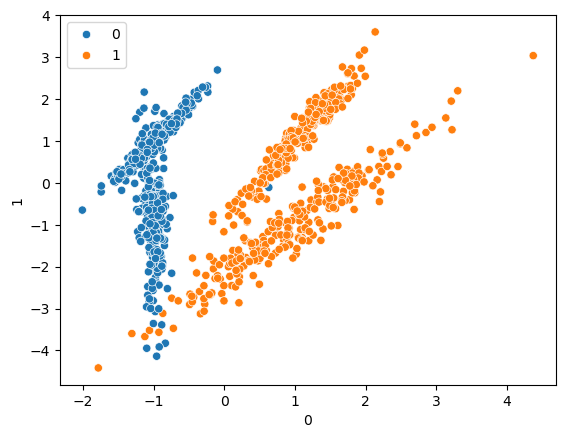

In [64]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [58]:
pd.DataFrame(X)[1]

0     -1.660768
1      0.161995
2      0.238841
3      0.736165
4      0.981340
         ...   
995   -0.340127
996    0.022356
997    1.491407
998    1.413363
999   -2.816052
Name: 1, Length: 1000, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=22)

In [66]:
from sklearn.svm import SVC,SVR

In [74]:
svc=SVC(kernel='linear')

In [76]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [78]:
y_pred=svc.predict(X_test)

In [80]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [82]:
accuracy_score(y_test,y_pred)

0.9848484848484849

In [86]:
confusion_matrix(y_test,y_pred)

array([[165,   2],
       [  3, 160]], dtype=int64)

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       167
           1       0.99      0.98      0.98       163

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



In [156]:
c=[0.1,0.001,1,10,2,0.02,100]
gamma=[0.1,0.001,0.0001,0.00001]
kernal=['linear', 'poly', 'rbf', 'sigmoid']
param=dict(C=c,gamma=gamma,kernel=kernal)

In [158]:
param

{'C': [0.1, 0.001, 1, 10, 2, 0.02, 100],
 'gamma': [0.1, 0.001, 0.0001, 1e-05],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [160]:
# we can directly write in dic formate also

In [162]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(SVC(),param_grid=param,cv=5,verbose=3,refit=True)

In [164]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.985 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.993 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.993 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.993 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.993 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.672 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.784 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.694 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.694 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.619 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.955 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rb

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 1, 10, 2, 0.02, 100],
                         'gamma': [0.1, 0.001, 0.0001, 1e-05],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [166]:
y_pred=grid.predict(X_test)


In [170]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       167
           1       0.99      0.99      0.99       163

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330



In [172]:
confusion_matrix(y_test,y_pred)

array([[165,   2],
       [  2, 161]], dtype=int64)

In [174]:
# support vector regression

In [241]:
df=sns.load_dataset('tips')

In [243]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [247]:
df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [249]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [251]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [253]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [255]:
df['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [257]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [259]:
X=df.iloc[:,1:]
y=df['total_bill']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [261]:
# pd.get_dummies(df)

In [263]:
from sklearn.preprocessing import LabelEncoder

In [265]:
lb1=LabelEncoder()
lb2=LabelEncoder()
lb3=LabelEncoder()

In [267]:
X_train['sex']=lb1.fit_transform(X_train['sex'])
X_train['smoker']=lb2.fit_transform(X_train['smoker'])
X_train['time']=lb3.fit_transform(X_train['time'])

In [269]:
X_test['sex']=lb1.transform(X_test['sex'])
X_test['smoker']=lb2.transform(X_test['smoker'])
X_test['time']=lb3.transform(X_test['time'])

In [273]:
X_test.head()

,tip,sex,smoker,day,time,size
162,2.00,0,0,Sun,0,3
60,3.21,1,1,Sat,0,2
61,2.00,1,1,Sat,0,2
63,3.76,1,1,Sat,0,4
69,2.09,1,1,Sat,0,2


In [275]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [295]:
ct=ColumnTransformer(transformers=[('onehot',OneHotEncoder(drop='first'),[3] )],remainder='passthrough')

In [300]:
X_train=ct.fit_transform(X_train)

In [304]:
X_test=ct.transform(X_test)

In [309]:
svr=SVR()

In [311]:
svr.fit(X_train,y_train)

SVR()

In [313]:
y_pred=svr.predict(X_test)

In [317]:
from sklearn.metrics import r2_score

In [319]:
r2_score(y_test,y_pred)

0.4299579306521971

In [321]:
# hyperparameter using grid searchcv

In [323]:
grid=GridSearchCV(SVR(),param_grid=param,cv=5,verbose=3,refit=True)

In [325]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.148 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.633 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.678 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.463 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.591 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.162 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.645 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.579 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.359 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.558 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.050 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 0.001, 1, 10, 2, 0.02, 100],
                         'gamma': [0.1, 0.001, 0.0001, 1e-05],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [327]:
y_pred=grid.predict(X_test)

In [329]:
r2_score(y_test,y_pred)

0.5118201335572181

In [331]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'linear'}